In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
%run my_split_func2.ipynb
# Function = my_train_test_split(X, y)
%run plot_features_importance.ipynb
#Function = plot_features_importance(model)

In [2]:
file = '/Users/Lisa/_Sports_Activity_Capstone/grouped_data/grouped_data.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
df

,person,activity_number,time,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,1,1,1.0,7.930544,1.169095,5.654536,0.002940,0.020659,-0.003139,-0.793103,...,-0.039000,-2.809729,-9.083978,2.626679,-0.005303,0.001935,-0.003317,0.740718,0.302500,-0.056373
1,1,1,2.0,7.883222,1.271661,5.700059,0.002205,0.020347,-0.003381,-0.792056,...,-0.039301,-2.796961,-9.086883,2.631203,-0.005166,0.001797,-0.003232,0.739271,0.302034,-0.056720
2,1,1,3.0,7.825126,1.340783,5.766320,0.002818,0.019563,-0.002821,-0.792395,...,-0.040353,-2.789059,-9.090416,2.629437,-0.005496,0.001615,-0.003151,0.738746,0.302321,-0.056930
3,1,1,4.0,7.838236,1.442390,5.724239,0.003405,0.020111,-0.003152,-0.791418,...,-0.041032,-2.780424,-9.095914,2.624423,-0.005100,0.001762,-0.002923,0.738183,0.302999,-0.057246
4,1,1,5.0,7.839314,1.497704,5.708884,0.003103,0.020234,-0.003310,-0.791132,...,-0.041533,-2.773596,-9.101732,2.611724,-0.005464,0.002143,-0.003231,0.737841,0.304157,-0.056492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,8,19,1.0,9.557651,-0.270247,0.889742,-0.018187,-0.025092,-0.004337,-0.679222,...,0.006729,-10.063521,-0.619705,-1.140875,0.011341,-0.023558,-0.000605,0.642958,0.236710,0.255006
756,8,19,2.0,9.543666,-0.256911,1.084630,-0.024946,0.003205,0.001218,-0.688656,...,-0.106791,-10.025448,-1.088265,-1.242026,0.004165,0.019041,-0.021512,0.634369,0.256596,0.364230
757,8,19,3.0,9.511916,-0.201919,1.075178,-0.001791,0.004643,-0.017372,-0.660721,...,-0.009925,-10.018549,-0.919432,-1.106094,0.002843,-0.010134,-0.030319,0.660857,0.400970,0.208620
758,8,19,4.0,9.375888,-0.536230,0.363037,-0.067781,-0.004438,-0.033103,-0.718401,...,0.183034,-9.946248,-0.881898,-0.750747,0.065316,0.019333,0.006914,0.685286,-0.156595,0.134312


In [5]:
X = df.drop('activity_number', axis=1)
X

,person,time,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,1,1.0,7.930544,1.169095,5.654536,0.002940,0.020659,-0.003139,-0.793103,-0.072006,...,-0.039000,-2.809729,-9.083978,2.626679,-0.005303,0.001935,-0.003317,0.740718,0.302500,-0.056373
1,1,2.0,7.883222,1.271661,5.700059,0.002205,0.020347,-0.003381,-0.792056,-0.076063,...,-0.039301,-2.796961,-9.086883,2.631203,-0.005166,0.001797,-0.003232,0.739271,0.302034,-0.056720
2,1,3.0,7.825126,1.340783,5.766320,0.002818,0.019563,-0.002821,-0.792395,-0.076676,...,-0.040353,-2.789059,-9.090416,2.629437,-0.005496,0.001615,-0.003151,0.738746,0.302321,-0.056930
3,1,4.0,7.838236,1.442390,5.724239,0.003405,0.020111,-0.003152,-0.791418,-0.076935,...,-0.041032,-2.780424,-9.095914,2.624423,-0.005100,0.001762,-0.002923,0.738183,0.302999,-0.057246
4,1,5.0,7.839314,1.497704,5.708884,0.003103,0.020234,-0.003310,-0.791132,-0.079372,...,-0.041533,-2.773596,-9.101732,2.611724,-0.005464,0.002143,-0.003231,0.737841,0.304157,-0.056492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,8,1.0,9.557651,-0.270247,0.889742,-0.018187,-0.025092,-0.004337,-0.679222,-0.181810,...,0.006729,-10.063521,-0.619705,-1.140875,0.011341,-0.023558,-0.000605,0.642958,0.236710,0.255006
756,8,2.0,9.543666,-0.256911,1.084630,-0.024946,0.003205,0.001218,-0.688656,-0.301232,...,-0.106791,-10.025448,-1.088265,-1.242026,0.004165,0.019041,-0.021512,0.634369,0.256596,0.364230
757,8,3.0,9.511916,-0.201919,1.075178,-0.001791,0.004643,-0.017372,-0.660721,-0.141897,...,-0.009925,-10.018549,-0.919432,-1.106094,0.002843,-0.010134,-0.030319,0.660857,0.400970,0.208620
758,8,4.0,9.375888,-0.536230,0.363037,-0.067781,-0.004438,-0.033103,-0.718401,-0.023834,...,0.183034,-9.946248,-0.881898,-0.750747,0.065316,0.019333,0.006914,0.685286,-0.156595,0.134312


In [6]:
y = df['activity_number']

In [7]:
X_train, X_test, y_train, y_test, random_values = my_train_test_split(X, y)

In [8]:
X_train['person'].unique()

array([1, 3, 4, 5, 7, 8])

In [9]:
X_test['person'].unique()

array([2, 6])

In [10]:
rf = RandomForestClassifier()

In [11]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
# rf.feature_importances_

In [13]:
# importances = pd.Series(data=rf.feature_importances_,
#                         index= X_train.columns)

In [14]:
# importances_sorted = importances.sort_values()

In [15]:
# importances_sorted.plot(kind='barh', color='lightgreen', figsize=(15,10))

In [16]:
def plot_features_importance(model):
    model.feature_importances_
    importances = pd.Series(data=rf.feature_importances_, index= X_train.columns)
    importances_sorted = importances.sort_values()
    importances_sorted.plot(kind='barh', color='red', figsize=(15,10))

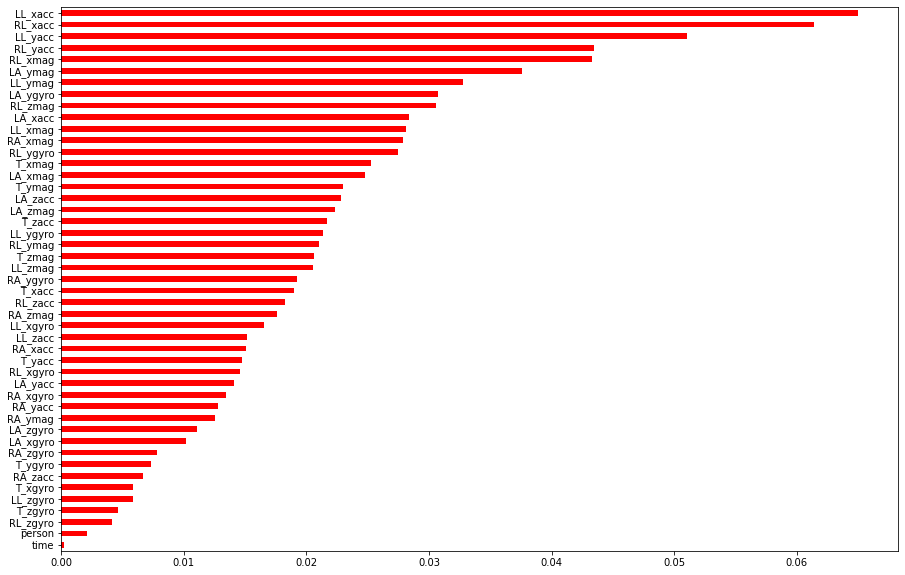

In [17]:
plot_features_importance(rf)

Seems like there's too much noise with ALL 45 features. Going to break the data into and train models on:
- Legs
- Arms
- Torso

Goal:
- Gain more insight on the devices, body parts, and their importance of prediciting an activity 